# Oil & Gas Well Data Exploration

See article on taanktech.com for more context on this analysis:
https://taanktech.com/2019/03/31/oil-is-the-new-data/

In [1]:
from datetime import date

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from shapely.geometry import Point, Polygon

## Get the data
Wells data is available from https://ndr.ogauthority.co.uk

In [2]:
df = pd.read_csv('MyWellsExtendedDenNo compatible-utf8.csv')

In [3]:
df.columns

Index(['WELLBORE_NAME', 'WELL_ORIGIN', 'SPUD_DATE', 'COMPLETION_DATE',
       'WELL_INTENT', 'CURRENT_STATUS', 'CURRENT_OWNER', 'LICENCE',
       'FIELD_NAME', 'WELLBORE_SEQUENCE_NUMBER', 'WELL_ORIGIN_STATUS',
       'SUBAREA_OPERATOR', 'ORIGINAL_OPERATOR', 'RELEASE_DATE',
       'RELEASE_ROUND', 'ELEVATION_REF', 'ELEVATION', 'WATER_DEPTH',
       'DRILLER_TD_MD', 'TVD', 'TD_DATE', 'COUNTRY_CODE', 'BH_AGE', 'CORED',
       'HYDROCARBONS_FLOW_CLASS', 'FALLOW', 'KICKOFF_DEPTH',
       'ORIG_SURF_X_LONG', 'ORIG_SURF_Y_LAT', 'ORIG_SURF_CRS_NAME',
       'ORIG_SURF_CRS_CODE', 'SURF_LOCATION_STATUS', 'ORIG_BH_X_LONG',
       'ORIG_BH_Y_LAT', 'ORIG_BH_CRS_NAME', 'ORIG_BH_CRS_CODE', 'PLATFORM',
       'PLATFORM_SLOT', 'PRIMARY_TARGET', 'WELL_PRODUCT', 'WELL_DEVIATION',
       'WELL_DRILLTYPE', 'WELL_TYPE', 'QUALITY_NOTE', 'DEN_NUMBER', 'ID',
       'WELL_ALIAS', 'WELL_ORIGIN_EXCEL_SAFE'],
      dtype='object')

In [4]:
df.head()

,WELLBORE_NAME,WELL_ORIGIN,SPUD_DATE,COMPLETION_DATE,WELL_INTENT,CURRENT_STATUS,CURRENT_OWNER,LICENCE,FIELD_NAME,WELLBORE_SEQUENCE_NUMBER,...,PRIMARY_TARGET,WELL_PRODUCT,WELL_DEVIATION,WELL_DRILLTYPE,WELL_TYPE,QUALITY_NOTE,DEN_NUMBER,ID,WELL_ALIAS,WELL_ORIGIN_EXCEL_SAFE
0,1/04- 1,1/04- 1,14-Oct-1982,25-Nov-1982,EXPLORATION,AB3,BP EXPLORATION,P367,NaN,WB1,...,A,NaN,VERTICAL,NaN,NaN,Cored value updated by RSALWAY at CDA on 29th ...,6748.0,798357,1:001/04 - 01:1/04-1:6748:WB1:1/4-1,1/04- 1
1,1/04- 2,1/04- 2,09-May-1983,18-May-1983,EXPLORATION,AB3,BP EXPLORATION,P367,NaN,WB1,...,B,NaN,VERTICAL,NaN,NaN,NaN,2134.0,798363,001/04 - 02:1/04-2:1/4-2:2134:WB1:2,1/04- 2
2,10/01- 1,10/01- 1,31-Dec-1971,08-Feb-1972,EXPLORATION,AB3,TOTAL UPSTREAM UK LIMITED,P118,NaN,WB1,...,NaN,NaN,NaN,NaN,NaN,NaN,380.0,766606,380:WB1:10/1-1:16316:010/01 - 01,10/01- 1
3,10/01- 1A,10/01- 1A,27-Feb-1972,07-May-1972,EXPLORATION,AB3,TOTAL UPSTREAM UK LIMITED,P118,FRIGG,WB1,...,NaN,GAS,VERTICAL,NaN,NaN,NaN,380.0,764966,10/01-1A:010/01 - 01A:380:WB1:10/1-1:1064:10/1-1A,10/01- 1A
4,10/01- 2,10/01- 2,09-May-1972,23-Jun-1972,EXPLORATION,AB3,TOTAL UPSTREAM UK LIMITED,P118,NaN,WB1,...,NaN,NaN,VERTICAL,NaN,NaN,Cored value updated by RSALWAY at CDA on 29th ...,405.0,764974,010/01 - 02:10/01-2:WB1:1065:10/1-2:405,10/01- 2


In [5]:
len(df)

12157

# The Age of Abondoned Wells

In [6]:
possible_statuses = set(df.CURRENT_STATUS.unique().tolist())
possible_statuses

{'AB1',
 'AB2',
 'AB3',
 'COMPLETED_OPERATING',
 'COMPLETED_SHUT_IN',
 'DRILLING',
 'PLUGGED'}

In [7]:
abandoned = {'AB3'}
active = possible_statuses - abandoned

In [8]:
# number of spud_dates
df.SPUD_DATE.notnull().sum()

12157

In [9]:
# earliest spud date
pd.to_datetime(df.SPUD_DATE).min()

Timestamp('1964-12-26 00:00:00')

In [10]:
df['today'] = pd.to_datetime(date.today())
df['age'] = df['today'] - pd.to_datetime(df.SPUD_DATE)

In [11]:
# date info
df['SPUD_DATE RELEASE_DATE COMPLETION_DATE age'.split()].head()

,SPUD_DATE,RELEASE_DATE,COMPLETION_DATE,age
0,14-Oct-1982,07-Jul-1988,25-Nov-1982,13315 days
1,09-May-1983,03-Jan-1989,18-May-1983,13108 days
2,31-Dec-1971,22-Jan-1979,08-Feb-1972,17255 days
3,27-Feb-1972,22-Jan-1979,07-May-1972,17197 days
4,09-May-1972,01-Dec-1980,23-Jun-1972,17125 days


## Histogram of Well Ages

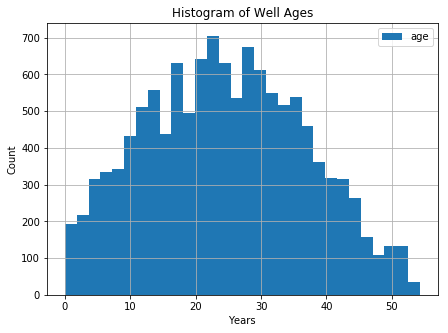

In [12]:
df['age_yrs'] = df.age.dt.days / 365
df['abandoned'] = df.CURRENT_STATUS == 'AB3'

fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('Years')
ax.set_ylabel('Count')
ax.set_title('Histogram of Well Ages')

df['age_yrs'].hist(bins=30, label='age', ax=ax)
plt.legend()

Text(0.5, 0, 'Years')

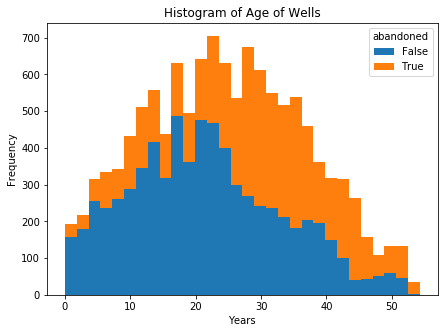

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
df.pivot(columns='abandoned').age_yrs.plot(bins=30, kind='hist', stacked=True, ax=ax)
ax.set_title('Histogram of Age of Wells')
ax.set_xlabel('Years')

# Locations of Abandoned and Active Wells

In [14]:
geometry = [Point(x, y) for _, (x, y) in df['ORIG_SURF_X_LONG ORIG_SURF_Y_LAT'.split()].iterrows()]

In [15]:
geo_df = gp.GeoDataFrame(df, geometry=geometry)

In [16]:
df_abandoned = geo_df[df.CURRENT_STATUS.isin(abandoned)]
df_active = geo_df[df.CURRENT_STATUS.isin(active)]
print(f'number of abandoned wells: {len(df_abandoned)}\nnumber of active wells: {len(df_active)}')

number of abandoned wells: 5173
number of active wells: 6984


Bathymetry files are available here: https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-bathymetry/

In [17]:
bathymetry_fnames = 'L_0 K_200 J_1000 I_2000 H_3000 G_4000 F_5000 E_6000 D_7000 C_8000 B_9000 A_10000'.split()
bathymetry_files = [gp.read_file(f'ne_10m_bathymetry_all/ne_10m_bathymetry_{fn}.shp') for fn in bathymetry_fnames]

## Global Bathymetry

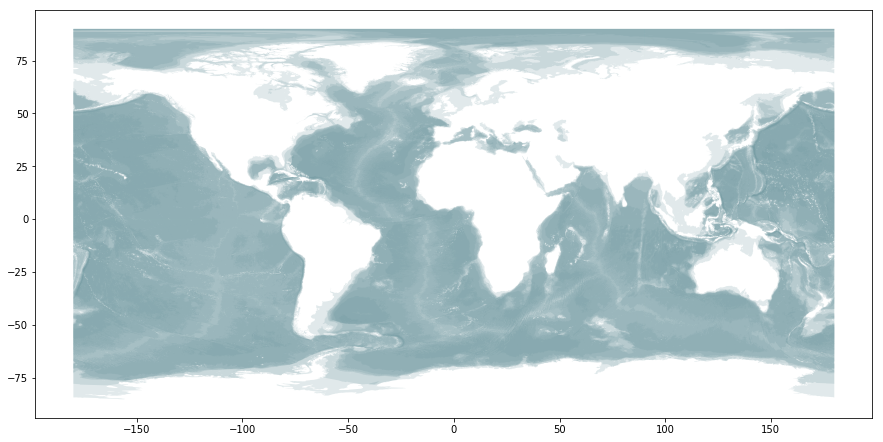

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))

for bf in bathymetry_files:
    bf.plot(ax=ax, color='#6A959D', alpha=0.2)

## Wells in UKCS (UK Continental Shelf)

Text(0.5, 1.0, 'Wells in UKCS')

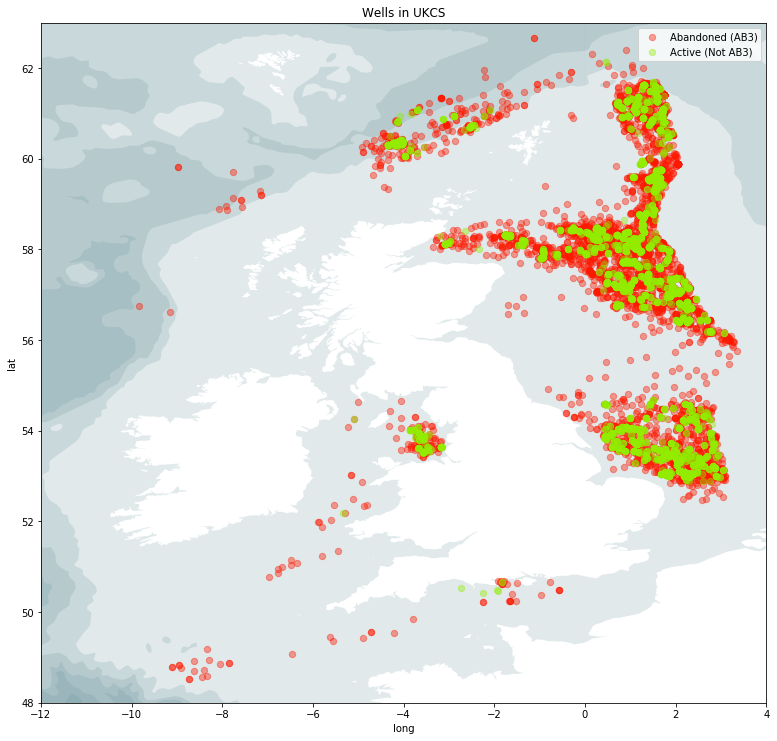

In [19]:
fig, ax = plt.subplots(figsize=(13, 13))

for bf in bathymetry_files:
    bf.plot(ax=ax, color='#6A959D', alpha=0.2)

ms = 40
df_abandoned.plot(ax=ax, color='#FF1800', marker='o', markersize=ms, alpha=0.4, label='Abandoned (AB3)')
df_active.plot(ax=ax, color='#92ED00', marker='o', markersize=ms, alpha=0.4, label='Active (Not AB3)')

plt.legend()
ax.set_xlim(left=-12, right=4)
ax.set_ylim(top=63, bottom=48)
ax.set_xlabel('long')
ax.set_ylabel('lat')
ax.set_title('Wells in UKCS')